In [113]:
# ADAM FRANKLIN
# ML PROJECT 2

In [4]:
import numpy as np
import pandas as pd

from IPython.display import display
#http://python.6.x6.nabble.com/IPython-User-ipython-notebook-how-to-display-image-not-from-pylab-td4497427.html

# plotting modules
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

pd.set_option('display.max_columns', 100)

In [5]:
#Reading and viewing traffic stop data

stops = pd.read_csv('C:/Users/Adam/Desktop/ECON628-01-adamjf/datasets/officer_traffic_stops.csv')               

In [6]:
stops.head()

,month_of_stop,reason_for_stop,officer_race,officer_gender,officer_years_of_service,driver_race,driver_ethnicity,driver_gender,driver_age,was_a_search_conducted,result_of_stop,cmpd_division,objectid,creationdate,creator,editdate,editor
0,2016/01,Speeding,White,Male,6,White,Non-Hispanic,Male,63,No,Citation Issued,Eastway Division,1001,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata
1,2016/01,Stop Light/Sign,White,Male,6,Black,Non-Hispanic,Male,35,No,Verbal Warning,Eastway Division,1002,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata
2,2016/01,Speeding,White,Male,6,Black,Non-Hispanic,Male,30,No,Citation Issued,Eastway Division,1003,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata
3,2016/01,Vehicle Regulatory,Black/African American,Male,2,Black,Non-Hispanic,Female,29,No,Verbal Warning,Metro Division,1004,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata
4,2016/01,Vehicle Regulatory,White,Male,6,White,Non-Hispanic,Male,45,No,Citation Issued,Eastway Division,1005,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata


In [7]:
#Reading and viewing monthly weather data

weather = pd.read_excel('C:/Users/Adam/Desktop/ECON628-01-adamjf/datasets/weather.xlsx')

In [8]:
weather.head()

,mo,month,mean,mean_max,mean_min,heating_degree_days,cooling_degree_days,highest,lowest,days_above_90,days_below_32,precip
0,1,Jan,39.5,49.9,29.0,792,0,66,14,0,22,2.28
1,2,Feb,44.6,54.5,34.6,593,0,74,17,0,16,4.50
2,3,Mar,58.5,70.5,46.5,236,34,86,29,0,1,0.85
3,4,Apr,61.8,73.5,50.0,155,58,88,34,0,0,2.03
4,5,May,68.1,78.2,58.0,44,140,88,44,0,0,5.63


In [9]:
weather.shape

(12, 12)

In [10]:
#Creating a column in stops called 'mo' (integer value of month) by which to join stops and weather datasets

stops['mo'] = pd.DatetimeIndex(stops['month_of_stop']).month

In [76]:
stops.head(10)

,month_of_stop,reason_for_stop,officer_race,officer_gender,officer_years_of_service,driver_race,driver_ethnicity,driver_gender,driver_age,was_a_search_conducted,result_of_stop,cmpd_division,objectid,creationdate,creator,editdate,editor,mo
0,2016/01,Speeding,White,Male,6,White,Non-Hispanic,Male,63,No,Citation Issued,Eastway Division,1001,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1
1,2016/01,Stop Light/Sign,White,Male,6,Black,Non-Hispanic,Male,35,No,Verbal Warning,Eastway Division,1002,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1
2,2016/01,Speeding,White,Male,6,Black,Non-Hispanic,Male,30,No,Citation Issued,Eastway Division,1003,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1
3,2016/01,Vehicle Regulatory,Black/African American,Male,2,Black,Non-Hispanic,Female,29,No,Verbal Warning,Metro Division,1004,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1
4,2016/01,Vehicle Regulatory,White,Male,6,White,Non-Hispanic,Male,45,No,Citation Issued,Eastway Division,1005,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1
5,2016/01,Stop Light/Sign,White,Male,6,White,Non-Hispanic,Female,65,No,Citation Issued,Eastway Division,1006,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1
6,2016/01,Stop Light/Sign,White,Male,6,White,Hispanic,Male,40,No,Citation Issued,Hickory Grove Division,1007,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1
7,2016/01,Vehicle Regulatory,Black/African American,Male,2,Black,Non-Hispanic,Male,28,No,Verbal Warning,Metro Division,1008,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1
8,2016/01,Vehicle Regulatory,White,Female,7,Black,Non-Hispanic,Female,57,No,Citation Issued,Metro Division,1009,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1
9,2016/01,Investigation,Asian / Pacific Islander,Male,9,White,Non-Hispanic,Male,29,Yes,Arrest,Westover Division,1010,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1


In [12]:
stops.shape

(79884, 18)

In [13]:
#Merging traffic stops and weather data on 'mo' (month of stop, monthly weather observation)

df = pd.merge(stops, weather, on='mo', left_index=False, right_index=False, sort=True, copy=True, indicator=False)

In [14]:
#Checking to see how merge went...OK

df.shape

(79884, 29)

In [15]:
#Investigating any null values...cmpd division is missing for many. With no other data to match and fill missing cells, 
#let's just drop that column. Heterogeneity in behavior between Charlotte PD divisions will not be a part of this study for now

df.isnull().sum()

month_of_stop                  0
reason_for_stop                0
officer_race                   0
officer_gender                 0
officer_years_of_service       0
driver_race                    0
driver_ethnicity               0
driver_gender                  0
driver_age                     0
was_a_search_conducted         0
result_of_stop                 0
cmpd_division               9586
objectid                       0
creationdate                   0
creator                        0
editdate                       0
editor                         0
mo                             0
month                          0
mean                           0
mean_max                       0
mean_min                       0
heating_degree_days            0
cooling_degree_days            0
highest                        0
lowest                         0
days_above_90                  0
days_below_32                  0
precip                         0
dtype: int64

In [16]:
del df['cmpd_division']

In [17]:
# Cool!

df.isnull().sum()

month_of_stop               0
reason_for_stop             0
officer_race                0
officer_gender              0
officer_years_of_service    0
driver_race                 0
driver_ethnicity            0
driver_gender               0
driver_age                  0
was_a_search_conducted      0
result_of_stop              0
objectid                    0
creationdate                0
creator                     0
editdate                    0
editor                      0
mo                          0
month                       0
mean                        0
mean_max                    0
mean_min                    0
heating_degree_days         0
cooling_degree_days         0
highest                     0
lowest                      0
days_above_90               0
days_below_32               0
precip                      0
dtype: int64

In [18]:
#Also, in order to do analysis, we will have to create columns with dummy variables for the categorical variables of interest

df_reason = pd.get_dummies(df['reason_for_stop'])
df_off_race = pd.get_dummies(df['officer_race'])
df_off_gen = pd.get_dummies(df['officer_gender'])
df_dr_race = pd.get_dummies(df['driver_race'])
df_dr_ethn = pd.get_dummies(df['driver_ethnicity'])
df_dr_gen = pd.get_dummies(df['driver_gender'])
df_search = pd.get_dummies(df['was_a_search_conducted'])
df_result = pd.get_dummies(df['result_of_stop'])

In [19]:
#Rejoining these new sub-dfs back into primary df

df2 = pd.concat([df, df_reason, df_off_race, df_off_gen, df_dr_race, df_dr_ethn, df_dr_gen, df_search, df_result], axis=1)

In [20]:
df2.columns = df2.columns.str.lower()
df2 = df2.rename(columns=lambda x: x.replace(' ', '_'))
df2 = df2.rename(columns=lambda x: x.replace('__', ''))
df2.shape

(79884, 64)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79884 entries, 0 to 79883
Data columns (total 64 columns):
month_of_stop                     79884 non-null object
reason_for_stop                   79884 non-null object
officer_race                      79884 non-null object
officer_gender                    79884 non-null object
officer_years_of_service          79884 non-null int64
driver_race                       79884 non-null object
driver_ethnicity                  79884 non-null object
driver_gender                     79884 non-null object
driver_age                        79884 non-null int64
was_a_search_conducted            79884 non-null object
result_of_stop                    79884 non-null object
objectid                          79884 non-null int64
creationdate                      79884 non-null object
creator                           79884 non-null object
editdate                          79884 non-null object
editor                            79884 non-null objec

In [77]:
df2.head(25)

,month_of_stop,reason_for_stop,officer_race,officer_gender,officer_years_of_service,driver_race,driver_ethnicity,driver_gender,driver_age,was_a_search_conducted,result_of_stop,objectid,creationdate,creator,editdate,editor,mo,month,mean,mean_max,mean_min,heating_degree_days,cooling_degree_days,highest,lowest,days_above_90,days_below_32,precip,checkpoint_,driving_while_impaired_,investigation,other,safe_movement,seatbelt_,speeding_,stop_light/sign,vehicle_movement_,vehicle_regulatory_,_,american_indian/alaska_native,asian_/_pacific_islander,black/african_american,hispanic/latino,native_hawaiian/oth_pac_island,not_specified,white,female,male,asian,black,native_american,other/unknown,white,hispanic,non-hispanic,female,male,no,yes,arrest,citation_issued,no_action_taken,verbal_warning,written_warning
0,2016/01,Speeding,White,Male,6,White,Non-Hispanic,Male,63,No,Citation Issued,1001,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1,Jan,39.5,49.9,29.0,792,0,66,14,0,22,2.28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0
1,2016/01,Stop Light/Sign,White,Male,6,Black,Non-Hispanic,Male,35,No,Verbal Warning,1002,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1,Jan,39.5,49.9,29.0,792,0,66,14,0,22,2.28,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0
2,2016/01,Speeding,White,Male,6,Black,Non-Hispanic,Male,30,No,Citation Issued,1003,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1,Jan,39.5,49.9,29.0,792,0,66,14,0,22,2.28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0
3,2016/01,Vehicle Regulatory,Black/African American,Male,2,Black,Non-Hispanic,Female,29,No,Verbal Warning,1004,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1,Jan,39.5,49.9,29.0,792,0,66,14,0,22,2.28,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0
4,2016/01,Vehicle Regulatory,White,Male,6,White,Non-Hispanic,Male,45,No,Citation Issued,1005,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1,Jan,39.5,49.9,29.0,792,0,66,14,0,22,2.28,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0
5,2016/01,Stop Light/Sign,White,Male,6,White,Non-Hispanic,Female,65,No,Citation Issued,1006,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1,Jan,39.5,49.9,29.0,792,0,66,14,0,22,2.28,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0
6,2016/01,Stop Light/Sign,White,Male,6,White,Hispanic,Male,40,No,Citation Issued,1007,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1,Jan,39.5,49.9,29.0,792,0,66,14,0,22,2.28,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0
7,2016/01,Vehicle Regulatory,Black/African American,Male,2,Black,Non-Hispanic,Male,28,No,Verbal Warning,1008,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1,Jan,39.5,49.9,29.0,792,0,66,14,0,22,2.28,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0
8,2016/01,Vehicle Regulatory,White,Female,7,Black,Non-Hispanic,Female,57,No,Citation Issued,1009,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1,Jan,39.5,49.9,29.0,792,0,66,14,0,22,2.28,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0
9,2016/01,Investigation,Asian / Pacific Islander,Male,9,White,Non-Hispanic,Male,29,Yes,Arrest,1010,2016-12-20T23:49:30.533Z,charlottedata,2016-12-20T23:49:30.533Z,charlottedata,1,Jan,39.5,49.9,29.0,792,0,66,14,0,22,2.28,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0


In [73]:
df2.officer_race.value_counts()

White                             57722
Black/African American            13886
Asian / Pacific Islander           4349
Hispanic/Latino                    2886
Not Specified                       460
                                    261
American Indian/Alaska Native       241
Native Hawaiian/Oth Pac Island       79
Name: officer_race, dtype: int64

In [24]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})
    
    dist.axvline(np.mean(data), lw=1, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})

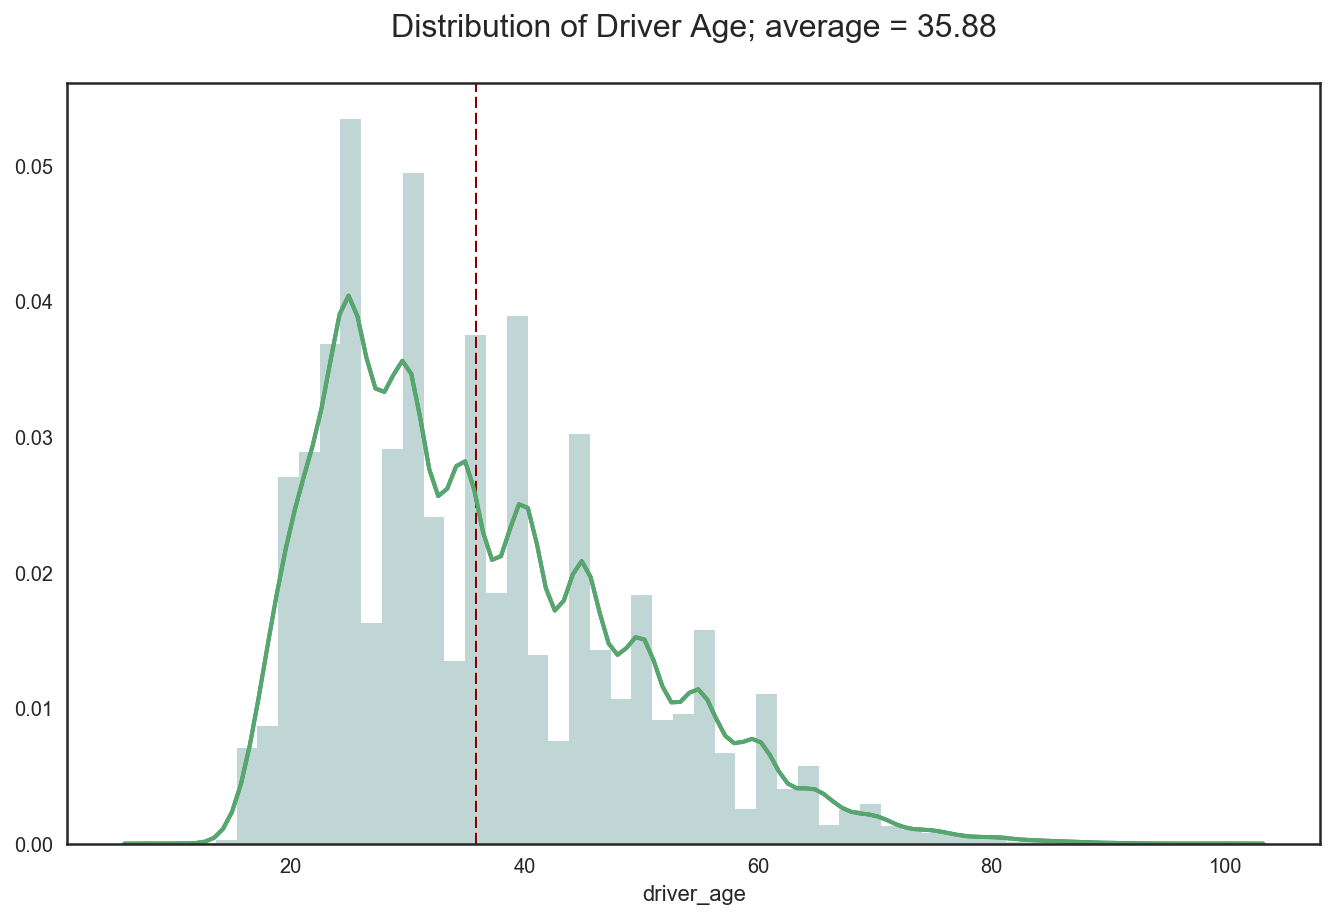

In [25]:
#Visualizing the data

driver_age = df.driver_age
officer_years_of_service = df.officer_years_of_service
histogram_plotter("Driver Age", driver_age)

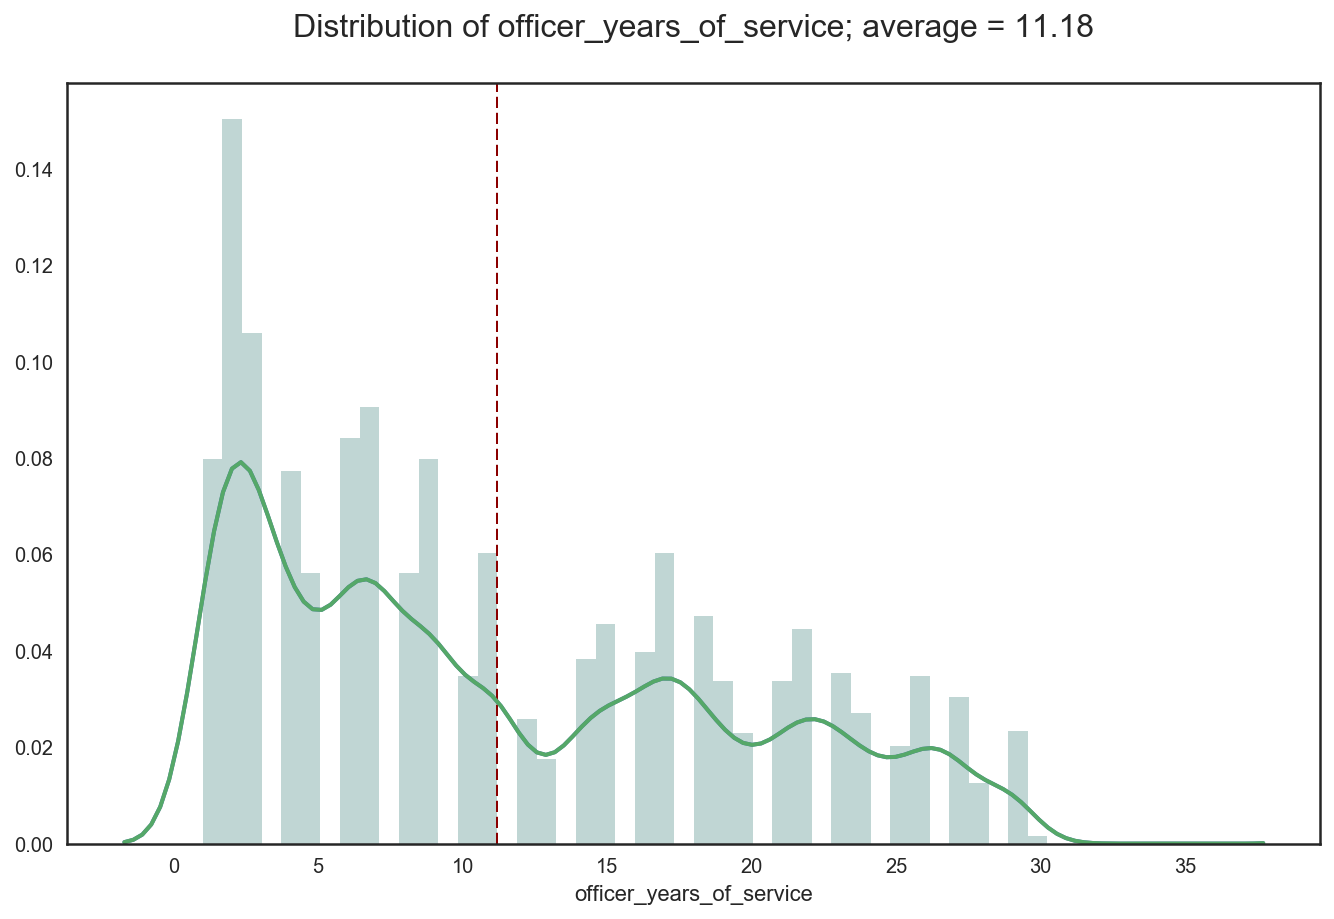

In [26]:
officer_years_of_service = stops.officer_years_of_service
histogram_plotter("officer_years_of_service", officer_years_of_service)

In [27]:
stops.reason_for_stop.value_counts()

Vehicle Regulatory           32405
Speeding                     22222
Stop Light/Sign               7946
Vehicle Movement              7535
Safe Movement                 4827
Investigation                 1992
Other                         1926
SeatBelt                       631
CheckPoint                     286
Driving While Impaired         114
Name: reason_for_stop, dtype: int64

In [28]:
stops.result_of_stop.value_counts()

Verbal Warning     40069
Citation Issued    32926
Written Warning     3395
No Action Taken     1914
Arrest              1580
Name: result_of_stop, dtype: int64

In [29]:
#sns.pairplot(df, hue='result_of_stop') SLOWWW. RUNS FOR 5-10 MINS
plt.tight_layout()
plt.show()

ValueError: max() arg is an empty sequence

In [30]:
# Creating regression data

x = df2[['checkpoint_', 
         'driving_while_impaired_', 
         'investigation', 
         'other', 
         'safe_movement', 
         'seatbelt_', 
         'speeding_',
         'stop_light/sign',
         'vehicle_movement_',
         'vehicle_regulatory_',
         '_',
         'american_indian/alaska_native',
         'asian_/_pacific_islander',
         'black/african_american',
         'hispanic/latino',
         'native_hawaiian/oth_pac_island',
         'not_specified',
         'white',
         'female',
         'male',
         'asian',
         'black',
         'native_american',
         'other/unknown',
         'white',
         'hispanic',
         'non-hispanic',
         'female',
         'male',
         'heating_degree_days', 
         'days_above_90',
         'days_below_32',
         'precip',
         'cooling_degree_days',
         'mean',
         'mean_max',
         'mean_min',
         'highest',
         'lowest'
         ]]

#potential outcomes of interest. This study will focus on what leads to an arrest

#search
w = df2[['yes']]
       
#arrest
y = df2[['arrest']]

#citation
z = df2[['citation_issued']]

#no action taken
p = df2[['no_action_taken']]

#verbal warning
q = df2[['verbal_warning']]

#written warning
r = df2[['written_warning']]

In [31]:
x.head()

,checkpoint_,driving_while_impaired_,investigation,other,safe_movement,seatbelt_,speeding_,stop_light/sign,vehicle_movement_,vehicle_regulatory_,_,american_indian/alaska_native,asian_/_pacific_islander,black/african_american,hispanic/latino,native_hawaiian/oth_pac_island,not_specified,white,white,female,female,male,male,asian,black,native_american,other/unknown,white,white,hispanic,non-hispanic,female,female,male,male,heating_degree_days,days_above_90,days_below_32,precip,cooling_degree_days,mean,mean_max,mean_min,highest,lowest
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,792,0,22,2.28,0,39.5,49.9,29.0,66,14
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,1,792,0,22,2.28,0,39.5,49.9,29.0,66,14
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,1,792,0,22,2.28,0,39.5,49.9,29.0,66,14
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,0,792,0,22,2.28,0,39.5,49.9,29.0,66,14
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,792,0,22,2.28,0,39.5,49.9,29.0,66,14


In [32]:
#normalize X

from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize

# use the "fit_transform" function to normalize the X dmatrix
Xn = ss.fit_transform(x)
Xn.shape

(79884L, 45L)

---

### Split your data into Train and Test, and check the shapes of your subsets
test size = 30% and random_state = 10

In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape



C:\Users\Adam\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(55918L, 45L) (23966L, 45L)


(55918, 1) (23966, 1)


---

### Initiate a Linear Regression using Skelearn 


In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

## fit your model
lr.fit(X_train, y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

---

### Evaluate the performance of your OLS model on the train and on the test set


In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [36]:
lr.score(X_train, y_train)


0.061973574445518098

In [37]:
lr.score(X_test, y_test)

0.061662786046429947

In [38]:
# R^2 is 0.062 for train and test data. Small but significant explanatory power, good agreement btw train and test

In [39]:
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    

    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
  
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [40]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 0.02, test data: 0.02
R^2 OLS train data: 0.06, test data: 0.06


#Ridge regression

In [43]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [44]:
## Find the optimal alpha
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train,y_train)
    
print (optimal_ridge.alpha_)

1204.50354026


In [45]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(X_train, y_train)

Ridge(alpha=1204.5035402587823, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [46]:
## Evaluate the Ridge Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

MSE Ridge train data: 0.02, test data: 0.02
R^2 Ridge train data: 0.06, test data: 0.06


**Now implement a Lasso Regression**

In [47]:
## Find the optimal alpha
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

C:\Users\Adam\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.000311098955503


In [49]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(X_train, y_train)

Lasso(alpha=0.00031109895550271601, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
## Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 0.02, test data: 0.02
R^2 Lasso train data: 0.06, test data: 0.06


**Now implement Elastic Net Regression**

In [52]:
## Find the optimal alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.000283638234678
1.0


In [53]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(X_train, y_train)

ElasticNet(alpha=0.00028363823467842595, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [54]:
## Evaluate the Elastic Net Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

MSE Elastic Net train data: 0.02, test data: 0.02
R^2 Elastic Net train data: 0.06, test data: 0.06


In [55]:
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    

    return method_coefs.head(10)
    

In [71]:
best_reg_method(x, lasso)

,abs_coef,coef,variable
1,0.027818,0.027818,driving_while_impaired_
2,0.014115,0.014115,investigation
20,0.008089,-0.008089,female
24,0.006268,0.006268,black
3,0.005351,0.005351,other
0,0.002438,0.002438,checkpoint_
13,0.002246,-0.002246,black/african_american
6,0.002150,-0.002150,speeding_
5,0.002028,0.002028,seatbelt_
8,0.001852,0.001852,vehicle_movement_


---
## Now implement a Regression Tree
Include a gridsearch and crossvalidate your results 5 times cv=5

In [95]:
## Back to non-regularized feature data

from sklearn.cross_validation import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
print x1_train.shape, x1_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(55918, 45) (23966, 45)


(55918, 1) (23966, 1)


In [96]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch you can manipulate these values
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=4, verbose=1)

In [97]:
## Fit the regresion tree
dtr_gs.fit(x1_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.8min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [98]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 10}


best score 0.0577021809963


In [99]:
## Print the features that best explain your Y
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [100]:
feature_importance(x, dtr_best)

,feature,importance
1,driving_while_impaired_,0.590363
2,investigation,0.158923
24,black,0.080488
32,female,0.046281
3,other,0.031314
22,male,0.021080
38,precip,0.014606
44,lowest,0.014480
43,highest,0.009406
0,checkpoint_,0.008653


In [101]:
## Predict 
y_pred_dtr= dtr_best.predict(x1_test)
y_pred_dtr

array([ 0.03096903,  0.00634653,  0.02121023, ...,  0.01050474,
        0.03096903,  0.03096903])

In [102]:
## Evaluate the Regression Tree performance on your train and test data
rsquare_meansquare_error(y_train, y_test, x1_train, x1_test, "Regression tree", dtr_best)

MSE Regression tree train data: 0.02, test data: 0.02
R^2 Regression tree train data: 0.07, test data: 0.07


In [103]:
## Visualize your tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [105]:
#Having some trouble visualizing the data...

dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=x.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

UnicodeDecodeError: 'ascii' codec can't decode byte 0xef in position 0: ordinal not in range(128)

---
## Now implement a Random Forest Regression Tree
Include a gridsearch and cv=5

In [106]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [107]:
## Fit your random forest tree
estimator_rfr.fit(x1_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  9.5min finished
C:\Users\Adam\Anaconda2\lib\site-packages\sklearn\grid_search.py:619: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [109]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 4}


best score 0.0612312435843


In [110]:
## Print the feauure importance
feature_importance(x, rfr_best)

,feature,importance
1,driving_while_impaired_,0.647129
2,investigation,0.171364
24,black,0.082254
34,male,0.021577
20,female,0.016738
22,male,0.016511
3,other,0.016479
32,female,0.013284
38,precip,0.003417
6,speeding_,0.001657


In [111]:
## Predict
y_pred_rfdtr= rfr_best.predict(x1_test)
y_pred_rfdtr

array([ 0.03215651,  0.00709865,  0.01289986, ...,  0.01289986,
        0.03215651,  0.03215651])

In [112]:
## Evaluate your model
rsquare_meansquare_error(y_train, y_test, x1_train, x1_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.02, test data: 0.02
R^2 Random Forest Regression tree train data: 0.06, test data: 0.06


In [ ]:
#Statistical report - We compile data from Charlotte, NC traffic stops for the year 2016 and monthly weather observation
# summaries (to match the monthly form of the police data). We investigate the effects of officer and driver race, gender,
# age/tenure, and reason for stop on the odds that the stop ends in arrest. We use OLS, regularized regression methods of 
# Lasso, Ridge, and elastic net. We go on to use the unsupervised methods known as regression tree and random forest regression
# tree. The explanatory power of all methods is within 1 percentage point of one another at 6%. Just a few features are found
# to have the most predictive power, although different methods differ on the quantitative difference between them. The order
# at least remains the same: DWI, investigation, black driver. Most interestingly, all agree that being black (#3 determinant
# of arrest) is just about half as likely to get you arrested as being the subject of a stop resulting from an ongoing 
# investigation. Methods differ on the relationship of these two variables to the most important determinant in arrest: being
# stopped for suspicion of driving while impaired. Random forest regression tree method estimates that being black is about 1/8
# as likely to get you arrested as being stopped for suspicion of DWI (lowest value of all methods), while Lasso estimates
# that it is 1/3 as bad! All methods agree that other variables have tiny to insignificant effects on arrest outcome.
# The largest problem with this analysis has been my inability to separate the categorical dummy variables I created with 
# repeat names, i.e. male male female female columns for driver and officer gender. As these features don't stand out in the
# analysis we can overlook them for now, but I'd prefer to know which was which as they are the third-tier determinants, not
# completely insignificant.
# The maximum potential of knowledge to be drawn, I believe, from this data is in the interactions. Going forward, I would like
# to do a massive gridsearch of 2- and 3- and even 4-level interaction between columns, i.e. what if the stop is a white male
# officer and a black male driver, or white male officer / white female driver, or white male officer / nonwhite female driver.
# At the level of analysis performed, the different methods provided similar results with a similar input of time. I believe
# doing the type of analysis explained here, I would generate multi-dimensional interaction variables or, better, find a way
# to do a gridsearch of thousands to tens of thousands of them and implement a random forest regression tree with pruning.
# And I'd need a lot of computing power...


# Non-statistical analysis: The primary determinant, by any measure, of a stop resulting in arrest is being pulled over 
# for suspicion of driving while intoxicated. This makes sense and, as a policy, probably shouldn't change. Being stopped
# during an investigation is number two. Alarmingly, but probably not surprisingly, being black is the third most important
# determinant of being arrested during a traffic stop. Weather is not found to play a significant role in arrest outcomes of 
# stops. 
    